In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
data = pd.read_csv('/content/beer-servings (1).csv' , index_col='Unnamed: 0')
data.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0.0,0.0,0.0,0.0,Asia
1,Albania,89.0,132.0,54.0,4.9,Europe
2,Algeria,25.0,0.0,14.0,0.7,Africa
3,Andorra,245.0,138.0,312.0,12.4,Europe
4,Angola,217.0,57.0,45.0,5.9,Africa


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 185 non-null    float64
 2   spirit_servings               185 non-null    float64
 3   wine_servings                 187 non-null    float64
 4   total_litres_of_pure_alcohol  192 non-null    float64
 5   continent                     193 non-null    object 
dtypes: float64(4), object(2)
memory usage: 10.6+ KB


In [5]:
data.describe()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
count,185.000000,185.000000,187.000000,192.000000
mean,105.124324,83.221622,50.165775,4.741667
std,100.524714,89.142958,80.358868,3.767654
min,0.000000,0.000000,0.000000,0.000000
25%,20.000000,4.000000,1.000000,1.300000
50%,76.000000,60.000000,9.000000,4.250000
75%,185.000000,132.000000,60.500000,7.200000
max,376.000000,438.000000,370.000000,14.400000


In [6]:
data.isna().sum()

country                         0
beer_servings                   8
spirit_servings                 8
wine_servings                   6
total_litres_of_pure_alcohol    1
continent                       0
dtype: int64

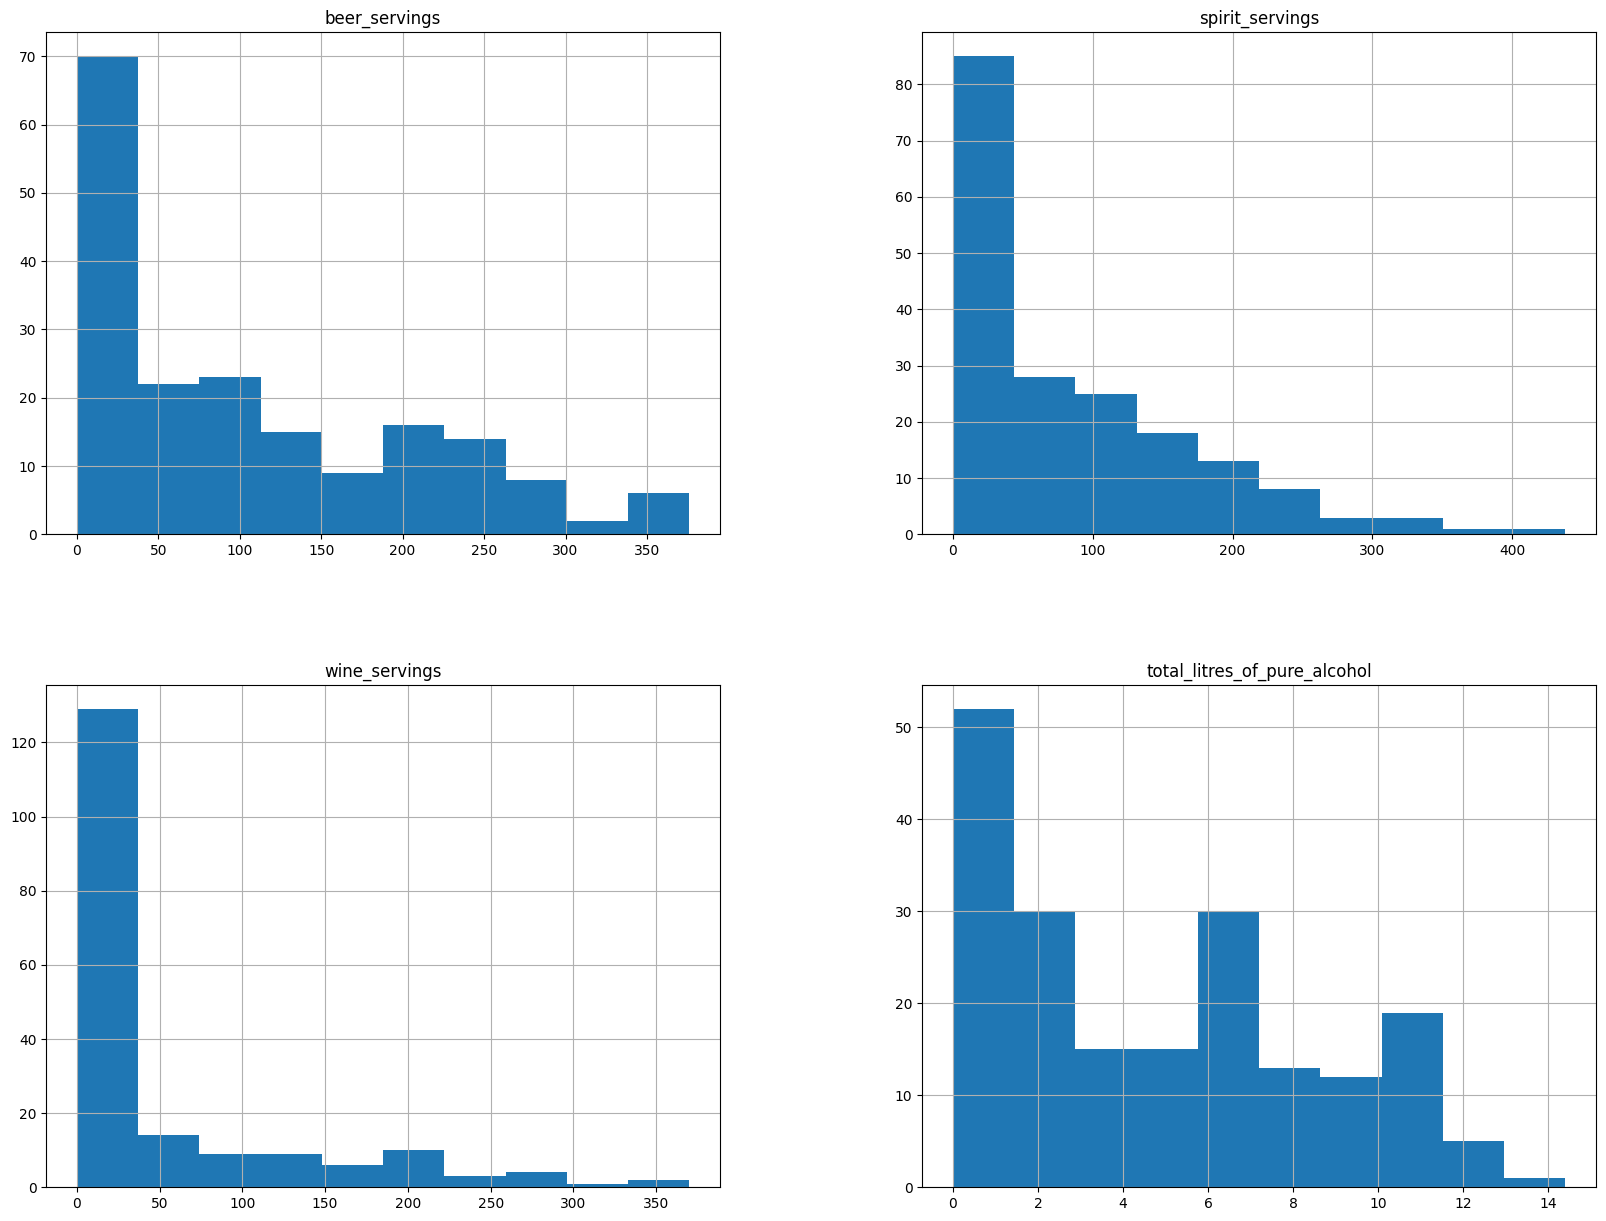

In [7]:
freqgraph= data.select_dtypes(include= 'float64')
freqgraph.hist(figsize=(20,15));

In [8]:
data['beer_servings']= data['beer_servings'].fillna(data['beer_servings'].median())
data['wine_servings']= data['wine_servings'].fillna(data['wine_servings'].median())
data['wine_servings']= data['wine_servings'].fillna(data['wine_servings'].median())
data['total_litres_of_pure_alcohol']= data['total_litres_of_pure_alcohol'].fillna(data['total_litres_of_pure_alcohol'].median())

In [9]:
num_cols = ['beer_servings','wine_servings','wine_servings','total_litres_of_pure_alcohol']

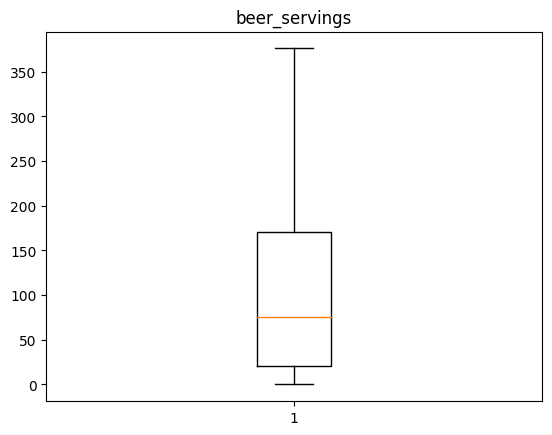

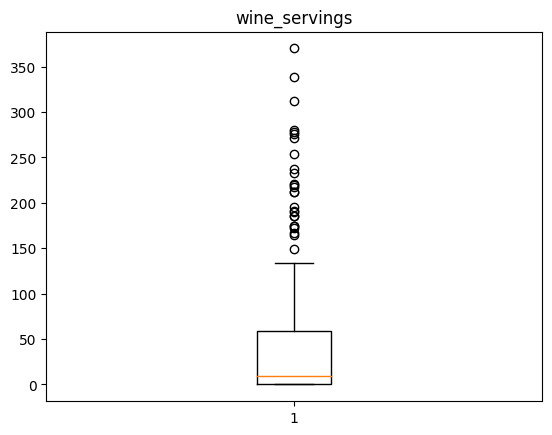

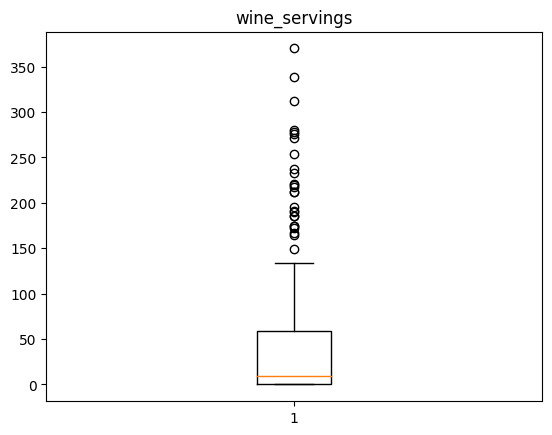

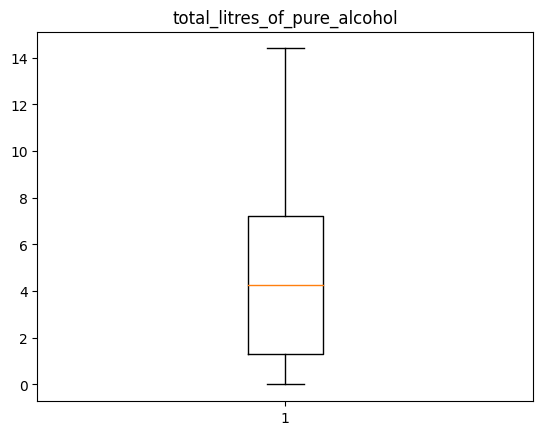

In [10]:
for i in num_cols:
  plt.figure()
  plt.boxplot(data[i])
  plt.title(i)

In [11]:
Q1 = np.percentile(data['wine_servings'],25,method='midpoint')
Q2 = np.percentile(data['wine_servings'],50,method='midpoint')
Q3 = np.percentile(data['wine_servings'],75,method='midpoint')

In [12]:
print("Q1 is",Q1)
print("Q2 is",Q2)
print("Q3 is",Q3)

Q1 is 1.0
Q2 is 9.0
Q3 is 59.0


In [13]:
IQR = Q3-Q1
IQR

58.0

In [14]:
low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR

In [15]:
print("lower limit is",low_lim)
print("Upper limit is",up_lim)

lower limit is -86.0
Upper limit is 146.0


In [16]:
outlier = []
for x in data['wine_servings']:
  if((x > up_lim) or (x < low_lim)):
    outlier.append(x)
outlier

[312.0,
 221.0,
 212.0,
 191.0,
 212.0,
 172.0,
 254.0,
 278.0,
 233.0,
 370.0,
 149.0,
 175.0,
 218.0,
 185.0,
 165.0,
 237.0,
 271.0,
 190.0,
 175.0,
 339.0,
 167.0,
 276.0,
 186.0,
 280.0,
 195.0,
 220.0]

In [17]:
data['wine_servings'] = data['wine_servings'].clip(lower = low_lim , upper = up_lim)

In [18]:
outlier = []
for x in data['wine_servings']:
  if((x > up_lim) or (x < low_lim)):
    outlier.append(x)
outlier

[]

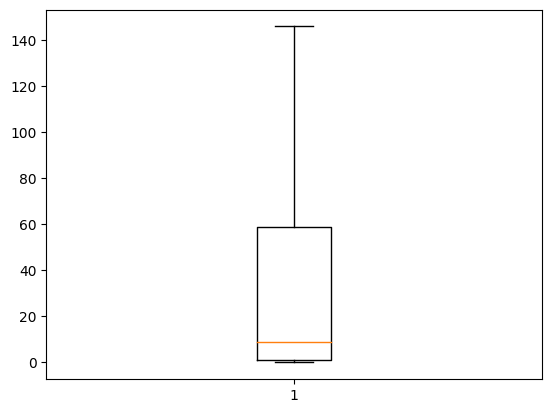

In [19]:
plt.boxplot(data['wine_servings'])
plt.show()

# Z SCORE METHOD



In [22]:
import seaborn as sns
data1 = pd.read_csv('/content/beer-servings (1).csv',index_col='Unnamed: 0')
data1.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0.0,0.0,0.0,0.0,Asia
1,Albania,89.0,132.0,54.0,4.9,Europe
2,Algeria,25.0,0.0,14.0,0.7,Africa
3,Andorra,245.0,138.0,312.0,12.4,Europe
4,Angola,217.0,57.0,45.0,5.9,Africa


<ipython-input-23-d1dca12d0ebe>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data1['wine_servings'])


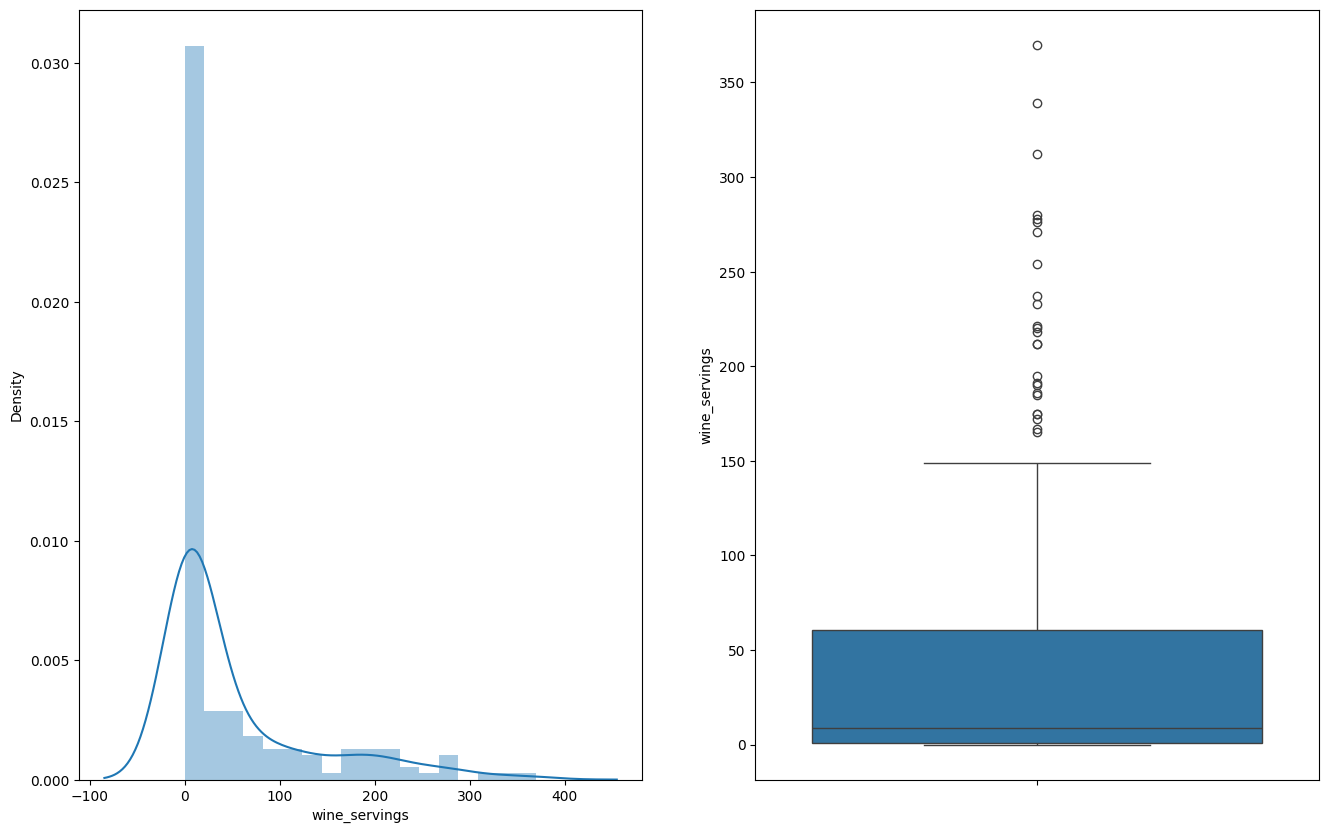

In [23]:
plt.figure(figsize=(16,10))
plt.subplot(1,2,1)
sns.distplot(data1['wine_servings'])


plt.subplot(1,2,2)
sns.boxplot(data1['wine_servings'])
plt.show()

In [24]:
from scipy.stats import zscore
zscore = zscore(data1.wine_servings,nan_policy='omit')
data1['zscore'] = zscore
data1.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,zscore
0,Afghanistan,0.0,0.0,0.0,0.0,Asia,-0.625948
1,Albania,89.0,132.0,54.0,4.9,Europe,0.047842
2,Algeria,25.0,0.0,14.0,0.7,Africa,-0.451262
3,Andorra,245.0,138.0,312.0,12.4,Europe,3.267059
4,Angola,217.0,57.0,45.0,5.9,Africa,-0.064456


In [25]:
#Removing unnecessary fields
data1.drop(columns = ['beer_servings'	,'spirit_servings','total_litres_of_pure_alcohol'],axis = 1 ,inplace = True)
data1.head()

,country,wine_servings,continent,zscore
0,Afghanistan,0.0,Asia,-0.625948
1,Albania,54.0,Europe,0.047842
2,Algeria,14.0,Africa,-0.451262
3,Andorra,312.0,Europe,3.267059
4,Angola,45.0,Africa,-0.064456


In [26]:
#Basic data regarding the field wine_servings
print("Mean of data",data1['wine_servings'].mean())
print("Std deviation of data",data1['wine_servings'].std())
print("Max of data",data1['wine_servings'].max())
print("Min of data",data1['wine_servings'].min())

Mean of data 50.16577540106952
Std deviation of data 80.35886783413324
Max of data 370.0
Min of data 0.0


In [27]:
#find the limits
low_lim = data1.wine_servings.mean() - 3 * data1.wine_servings.std()
up_lim = data1.wine_servings.mean() + 3 * data1.wine_servings.std()

print("lower limit is",low_lim)
print("Upper limit is",up_lim)

lower limit is -190.9108281013302
Upper limit is 291.2423789034692


In [28]:
#Outliers

#Taking threshold as +-3

data1[(data1.zscore < -3) | (data1.zscore > 3)]


,country,wine_servings,continent,zscore
3,Andorra,312.0,Europe,3.267059
61,France,370.0,Europe,3.990759
136,Portugal,339.0,Europe,3.603953


In [29]:
#Outliers Removed
data1 = data1[(data1.zscore > -3) & (data1.zscore < 3)]
data1

,country,wine_servings,continent,zscore
0,Afghanistan,0.0,Asia,-0.625948
1,Albania,54.0,Europe,0.047842
2,Algeria,14.0,Africa,-0.451262
4,Angola,45.0,Africa,-0.064456
5,Antigua & Barbuda,45.0,North America,-0.064456
...,...,...,...,...
188,Venezuela,3.0,South America,-0.588515
189,Vietnam,1.0,Asia,-0.613470
190,Yemen,0.0,Asia,-0.625948
191,Zambia,4.0,Africa,-0.576037


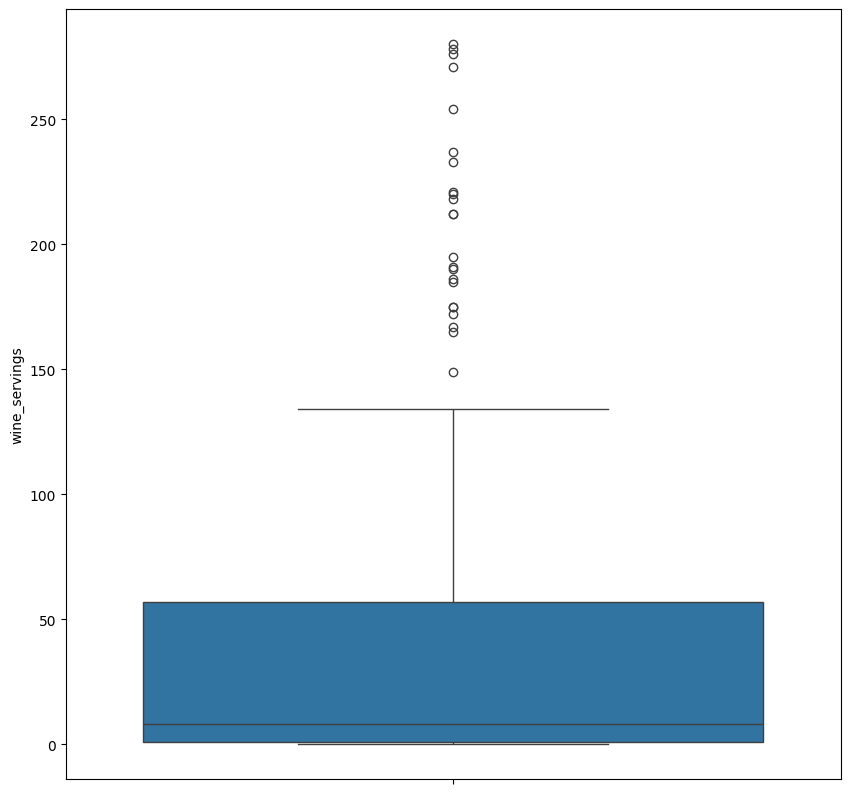

In [30]:
plt.figure(figsize=(10,10))
sns.boxplot(data1['wine_servings'])
plt.show()

WORKSPACE

MENTIONED BELOW ARE NOT REQUIRED

In [31]:
#Outliers removed using ilimits ||| Not need
data1.loc[(data1.wine_servings < up_lim) & (data1.wine_servings > low_lim)]

,country,wine_servings,continent,zscore
0,Afghanistan,0.0,Asia,-0.625948
1,Albania,54.0,Europe,0.047842
2,Algeria,14.0,Africa,-0.451262
4,Angola,45.0,Africa,-0.064456
5,Antigua & Barbuda,45.0,North America,-0.064456
...,...,...,...,...
188,Venezuela,3.0,South America,-0.588515
189,Vietnam,1.0,Asia,-0.613470
190,Yemen,0.0,Asia,-0.625948
191,Zambia,4.0,Africa,-0.576037


In [32]:
#Normal method to find zscore
#data1['zscore'] = (data1.wine_servings - data1.wine_servings.mean())/data1.wine_servings.std()
#data1.head()